# Steam Games Recommendation Engine
__Name:__ Husain Radhi

__Topic Name:__ Steam Games Recommendation Engine


# Introduction
The dataset used was taken from kaggle: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset . It was collected from steamspy and steam's API and the data is only updated up to late 2024. 

Steam is a PC gaming platform where you can purchase video games digitally and download them. It hosts more than 100k games and most major publishers use the steam platform to sell their games on PC. The dataset contains around 110k games where each row is one game and the columns include but not limited to game description, release date, price, websites and other game information. There are 39 columns in total.


## Problem Statement + Aim
Steam is a PC gaming platform that has more than 110k games. It can be quite challenging and time-consuming to search for games that match your preferences in such a large platform. This is more exacerbated when we are talking about niche interests/games. Small developers suffer the brunt of this as they struggle for visibility on the platform. In 2024, VGInsights released a report stating that in 2023, 61% of the gaming revenue was generated by only the top 10 games which released that year. Hence, my aim is to build a recommendation engine to reduce the frustration of the users and increase the visibility of highly rated, but not wellknown video games. This could also increase the revenue even both the platform and then developers of the recommended games as more users purchase from steam. I expect the model to decrease the impact of the top 10 games by 5%. This model can be used by the steam platform to recommend games to users or by users directly through a third party website.


## Objectives

- What features would be most useful to recommend the appropriate games?
- Can feature engineering improve the recommendations?
- Which type of model would be useful for recommendations?
- How do different models compare?
- How do you evaluate recommendations?


# Data Inspection
## Data Dictionary

The following is the Data Dictionary, I have added new columns that you will see at the end of this notebook:


| Column Name | Description |
| :--- | :--- |
| **AppID** | Game AppID |
| **Name** | Game name |
| **Release date** | Release date |
| **Estimated owners** | Estimated number of owners of the game |
| **Peak CCU** | Peak concurrent users yesterday |
| **Required age** | Required age to play the game |
| **Price** | Price of the game in USD |
| **DLC count** | Number of Downloadable Content (DLC) available for the game |
| **About the game** | Detailed description of the game, slightly different from the detailed_description column |
| **Supported languages** | List of languages supported by the game |
| **Full audio languages** | List of languages with full audio support |
| **Reviews** | Total number of user reviews |
| **Header image** | URL of the header image for the game |
| **Website** | Official website of the game |
| **Support url** | URL for the game's support page |
| **Support email** | Contact email for game support |
| **Windows** | Boolean indicating if the game runs on Windows |
| **Mac** | Boolean indicating if the game runs on macOS |
| **Linux** | Boolean indicating if the game runs on Linux |
| **Metacritic score** | Game score imported from metacritic site |
| **Metacritic url** | URL to the Metacritic page |
| **User score** | Score assigned by users (often 0 on Steam API) |
| **Positive** | Number of positive user reviews on steam |
| **Negative** | Number of negative user reviews on steam |
| **Score rank** | Steam score rank |
| **Achievements** | Total number of achievements available in the game |
| **Recommendations** | Number of user recommendations |
| **Notes** | Additional notes or requirements |
| **Average playtime forever** | Average playtime since release in minutes |
| **Average playtime two weeks** | Average playtime in the last two weeks in minutes |
| **Median playtime forever** | Median playtime since release in minutes |
| **Median playtime two weeks** | Median playtime in the last two weeks in minutes |
| **Developers** | Name of the game developer(s) |
| **Publishers** | Name of the game publisher(s) |
| **Categories** | Pre-defined categories by steam which are assigned to games by the developers |
| **Genres** | Most popular tags |
| **Tags** | User-defined tags |
| **Screenshots** | URLs of game screenshots |
| **Movies** | URLs of game trailers/videos |
| **detailed_description** | Detailed description of the game |
| **short_description** | Short description of the game |
| **tags_dict** | Tags converted to dictionary |
| **top_5_tags** | Top 5 most popular tags for each game |
| **rating** | Percentage of positive reviews out of all reviews |

I started the project by trying to fix the CSV file downloaded from the kaggle database (https://www.kaggle.com/datasets/fronkongames/steam-games-dataset), but there was an issue in the file that caused columns to be mislabeled. I tried fixing it, but it was taking too much time so I decided to the json file on the site, which after converting to a dataframe and transposing it, I managed to export it as a csv file which is what you see below. I created a new notebook to start with the new csv file.

#### EDA and cleaning

In [3]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import langid
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import torch
import gc
import ast

In [4]:
sg_df = pd.read_csv("SteamGames.csv")

In the context of this project which is creating a recommendation engine that takes user's input (a game) and recommends games based on the similarity and ratings/popularity. As such, there are many columns which are not relevant to this project that we will drop.

In [7]:
sg_df

,Unnamed: 0,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN
2,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",NaN,...,0,0,0 - 20000,0,0,0,0,0,[],NaN
3,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,NaN,...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111447,3600970,Paragon Of Time,"Apr 10, 2025",0,2.99,0,"You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the darkness that is corrupting time its...,NaN,...,5,0,0 - 20000,0,0,0,0,0,"{'Action Roguelike': 296, 'Bullet Hell': 290, ...",0.0
111448,3543710,A Few Days With : Hazel,"Apr 11, 2025",0,2.69,0,"Join Hazel, an attractive young lady, and enjo...","Join Hazel, an attractive young lady, and enjo...",Embark on a sensual butterfly-hunting adventur...,NaN,...,0,0,0 - 20000,0,0,0,0,0,[],10.0
111449,3265370,MosGhost,"Apr 1, 2025",0,7.99,0,Check out ADD TO WISHLIST About the Game Story...,Story : Andrei moved to Moscow for work and re...,"Having moved to Moscow, Andrei rents a cheap a...",NaN,...,24,12,0 - 20000,0,0,0,0,0,"{'Simulation': 70, 'Walking Simulator': 44, 'I...",0.0
111450,3423620,AccuBow VR,"Mar 11, 2025",0,0.00,0,AccuBow VR: Master Realistic Archery in Immers...,AccuBow VR: Master Realistic Archery in Immers...,Take your archery training to the next level a...,NaN,...,0,0,0 - 0,0,0,0,0,0,[],0.0


Let's display all columns in the dataframe for a better overview

In [9]:
with pd.option_context('display.max_columns', None): #this is to temporarily show all columns as by default pandas will not show everything
    display(sg_df.sample(n=20)) #I am using .sample to show random columns

,Unnamed: 0,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
82634,2586500,Pixel of Memory,"Oct 23, 2023",0,2.99,0,"Waking up disoriented, confused, and detached ...","Waking up disoriented, confused, and detached ...",Pixel of Memory is a wholesome minimalist puzz...,“Pixel of Memory is intended to be a bitterswe...,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://www.hikergames.com/en/contact-us-contac...,support@hikergames.com,True,False,False,0,NaN,6,0,NaN,['English'],['English'],"[{'title': 'Buy Pixel of Memory', 'description...",['Hiker Games'],['Hiker Games'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Adventure', 'Casual', 'Indie']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,25,0,0 - 20000,0,0,0,0,0,"{'Adventure': 121, 'Casual': 111, 'Arcade': 86...",NaN
4455,804690,The Vox: Tower Defense,"Jun 5, 2020",0,5.99,0,"Play by yourself, or online with up to 3 other...","Play by yourself, or online with up to 3 other...",See how long you can survive in this strategic...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://www.immersiveworks.co.uk/contact,support@immersiveworks.co.uk,True,False,False,0,NaN,32,0,NaN,['English'],['English'],"[{'title': 'Buy The Vox: Tower Defense', 'desc...",['Immersive Works'],['Immersive Works'],"['Single-player', 'Multi-player', 'Co-op', 'On...",['Strategy'],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1,0,0 - 20000,0,0,0,0,0,"{'Strategy': 82, 'Tower Defense': 13, 'Indie':...",NaN
89323,2732490,Hot And Lovely ：Suger,"Mar 29, 2024",0,2.79,1,New Games！ / / / Friendly games / About the Ga...,"Background introduction: As an ordinary man, y...",Hot And Lovely: Suger is a classic puzzle matc...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,lovelygames888@gmail.com,True,False,False,0,NaN,16,0,This game may contain content not suitable for...,"['English', 'Simplified Chinese', 'Russian', '...","['Japanese', 'Korean']","[{'title': 'Buy Hot And Lovely ：Suger', 'descr...",['Lovely Games'],['Lovely Games'],"['Single-player', 'Steam Achievements', 'Steam...",['Casual'],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,51,3,0 - 20000,0,0,0,0,66,"{'Sexual Content': 95, 'Nudity': 86, 'NSFW': 8...",NaN
47614,340410,SuperBike TT,"Feb 25, 2015",0,12.99,0,"SuperBike TT is a single-player, physics-based...","SuperBike TT is a single-player, physics-based...","SuperBike TT is a single-player, physics-based...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.ghostmachinevr.com/#!superbike-tt/c34s,http://www.ghostmachinevr.com/#!superbike-tt/c34s,support@ghostmachinevr.com,True,False,False,0,NaN,0,0,NaN,['English'],['English'],"[{'title': 'Buy SuperBike TT', 'description': ...",['Ghost Machine'],['Ghost Machine'],"['Single-player', 'Full controller support', '...","['Racing', 'Sports', 'Early Access']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,3,3,0 - 20000,0,0,0,0,0,"{'Racing': 23, 'Early Access': 21, 'Sports': 21}",NaN
32098,675010,MudRunner,"Oct 30, 2017",0,19.99,4,Buzz About the Game MudRunner is the ultimate ...,"MudRunner is the ultimate off-road experience,...",MudRunner is the ultimate off-road experience ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.focus-home.com/games/mudrunner-mobile,http://www.fo

In [10]:
sg_df.columns

Index(['Unnamed: 0', 'name', 'release_date', 'required_age', 'price',
       'dlc_count', 'detailed_description', 'about_the_game',
       'short_description', 'reviews', 'header_image', 'website',
       'support_url', 'support_email', 'windows', 'mac', 'linux',
       'metacritic_score', 'metacritic_url', 'achievements', 'recommendations',
       'notes', 'supported_languages', 'full_audio_languages', 'packages',
       'developers', 'publishers', 'categories', 'genres', 'screenshots',
       'movies', 'user_score', 'score_rank', 'positive', 'negative',
       'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'discount'],
      dtype='object')

Let's check the nulls

In [12]:
sg_df.isnull().sum()

Unnamed: 0                       0
name                             6
release_date                     0
required_age                     0
price                            0
dlc_count                        0
detailed_description          6457
about_the_game                6483
short_description             6376
reviews                     100828
header_image                     0
website                      64994
support_url                  60693
support_email                19025
windows                          0
mac                              0
linux                            0
metacritic_score                 0
metacritic_url              107447
achievements                     0
recommendations                  0
notes                        93003
supported_languages              0
full_audio_languages             0
packages                         0
developers                       0
publishers                       0
categories                       0
genres              

Let's get some general information about the columns

In [14]:
sg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                111452 non-null  int64  
 1   name                      111446 non-null  object 
 2   release_date              111452 non-null  object 
 3   required_age              111452 non-null  int64  
 4   price                     111452 non-null  float64
 5   dlc_count                 111452 non-null  int64  
 6   detailed_description      104995 non-null  object 
 7   about_the_game            104969 non-null  object 
 8   short_description         105076 non-null  object 
 9   reviews                   10624 non-null   object 
 10  header_image              111452 non-null  object 
 11  website                   46458 non-null   object 
 12  support_url               50759 non-null   object 
 13  support_email             92427 non-null   o

This shows that most of the columns are text-based, not numerical, .describe() will not be very useful in this case. Besides, pricing is not relevant to the project.

In [16]:
sg_df.describe()

,Unnamed: 0,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,discount
count,1.114520e+05,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,1.114520e+05,111452.000000,44.000000,1.114520e+05,111452.000000,111452.000000,111452.000000,111452.000000,111452.000000,1.114520e+05,14042.000000
mean,1.716972e+06,0.254208,7.061568,0.449530,2.623354,17.511144,6.163715e+02,0.030408,98.909091,7.543525e+02,125.859177,81.247290,9.174954,72.651330,9.891038,1.777215e+02,3.684447
std,9.203859e+05,2.035653,12.563246,12.006677,13.736245,150.139008,1.573854e+04,1.565136,0.857747,2.139410e+04,4002.844431,999.935906,168.201030,1321.333137,183.232812,8.390462e+03,9.250546
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.362550e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1.665065e+06,0.000000,3.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,3.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,2.453585e+06,0.000000,9.990000,0.000000,0.000000,17.000000,0.000000e+00,0.000000,100.000000,2.900000e+01,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
max,3.671840e+06,21.000000,999.980000,2366.000000,97.000000,9821.000000,3.441592e+06,100.000000,100.000000,5.764420e+06,895978.000000,145727.000000,19159.000000,208473.000000,19159.000000,1.311366e+06,92.000000


It's clear that many columns will not be useful for this project so let's remove them in one go.

In [18]:
sg_df.columns

Index(['Unnamed: 0', 'name', 'release_date', 'required_age', 'price',
       'dlc_count', 'detailed_description', 'about_the_game',
       'short_description', 'reviews', 'header_image', 'website',
       'support_url', 'support_email', 'windows', 'mac', 'linux',
       'metacritic_score', 'metacritic_url', 'achievements', 'recommendations',
       'notes', 'supported_languages', 'full_audio_languages', 'packages',
       'developers', 'publishers', 'categories', 'genres', 'screenshots',
       'movies', 'user_score', 'score_rank', 'positive', 'negative',
       'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'discount'],
      dtype='object')

In [19]:
sg_df.drop(columns= ['required_age', 'price', 'dlc_count','header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux','metacritic_url','achievements','supported_languages',
       'full_audio_languages', 'developers', 'publishers', 'discount'], axis=1, inplace=True)

I dropped the aforementioned columns as they are irrelevant to the project

Let's rename the first column to ID first (Maybe there was an issue while loading the database that caused this)

In [22]:
sg_df['Unnamed: 0']

0           20200
1          655370
2         1732930
3         1355720
4         1139950
           ...   
111447    3600970
111448    3543710
111449    3265370
111450    3423620
111451    3183790
Name: Unnamed: 0, Length: 111452, dtype: int64

In [23]:
sg_df.rename(columns = {'Unnamed: 0': "ID"}, inplace = True)

In [24]:
sg_df["ID"]

0           20200
1          655370
2         1732930
3         1355720
4         1139950
           ...   
111447    3600970
111448    3543710
111449    3265370
111450    3423620
111451    3183790
Name: ID, Length: 111452, dtype: int64

The ID is not important and it could be used as the index but let's ignore it for now

Let's check the name column, which refers to the game name

In [27]:
sg_df["name"]

0                Galactic Bowling
1                    Train Bandit
2                    Jolt Project
3                        Henosis™
4           Two Weeks in Painland
                   ...           
111447            Paragon Of Time
111448    A Few Days With : Hazel
111449                   MosGhost
111450                 AccuBow VR
111451     Defense Of Fort Burton
Name: name, Length: 111452, dtype: object

In [28]:
sg_df["release_date"]

0         Oct 21, 2008
1         Oct 12, 2017
2         Nov 17, 2021
3         Jul 23, 2020
4          Feb 3, 2020
              ...     
111447    Apr 10, 2025
111448    Apr 11, 2025
111449     Apr 1, 2025
111450    Mar 11, 2025
111451    Apr 10, 2025
Name: release_date, Length: 111452, dtype: object

In [29]:
sg_df["release_date"].isnull().sum()

np.int64(0)

Let's keep it for now, but the it is unlikely that it will be used

In [31]:
sg_df.iloc[:,[3]] #Instead of writing the column every time

,detailed_description
0,Galactic Bowling is an exaggerated and stylize...
1,THE LAW!! Looks to be a showdown atop a train....
2,Jolt Project: The army now has a new robotics ...
3,HENOSIS™ is a mysterious 2D Platform Puzzler w...
4,ABOUT THE GAME Play as a hacker who has arrang...
...,...
111447,"You stand at the edge of time, trying to save ..."
111448,"Join Hazel, an attractive young lady, and enjo..."
111449,Check out ADD TO WISHLIST About the Game Story...
111450,AccuBow VR: Master Realistic Archery in Immers...


In [32]:
sg_df.isnull().sum()

ID                               0
name                             6
release_date                     0
detailed_description          6457
about_the_game                6483
short_description             6376
reviews                     100828
metacritic_score                 0
recommendations                  0
notes                        93003
packages                         0
categories                       0
genres                           0
screenshots                      0
movies                           0
user_score                       0
score_rank                  111408
positive                         0
negative                         0
estimated_owners                 0
average_playtime_forever         0
average_playtime_2weeks          0
median_playtime_forever          0
median_playtime_2weeks           0
peak_ccu                         0
tags                             0
dtype: int64

There are similar numbers of missing values in the description columns, Let's try to remove the nulls from the highest to see if they are the same in other columns

In [34]:
sg_df.dropna(subset = ["about_the_game"],inplace=True)

In [35]:
sg_df.isnull().sum()

ID                               0
name                             1
release_date                     0
detailed_description             0
about_the_game                   0
short_description                4
reviews                      94361
metacritic_score                 0
recommendations                  0
notes                        86563
packages                         0
categories                       0
genres                           0
screenshots                      0
movies                           0
user_score                       0
score_rank                  104925
positive                         0
negative                         0
estimated_owners                 0
average_playtime_forever         0
average_playtime_2weeks          0
median_playtime_forever          0
median_playtime_2weeks           0
peak_ccu                         0
tags                             0
dtype: int64

I was mostly right but we can drop the nulls in the short description as well

In [37]:
sg_df.dropna(subset=["name","short_description"],inplace=True)
sg_df.isnull().sum()

ID                               0
name                             0
release_date                     0
detailed_description             0
about_the_game                   0
short_description                0
reviews                      94356
metacritic_score                 0
recommendations                  0
notes                        86559
packages                         0
categories                       0
genres                           0
screenshots                      0
movies                           0
user_score                       0
score_rank                  104920
positive                         0
negative                         0
estimated_owners                 0
average_playtime_forever         0
average_playtime_2weeks          0
median_playtime_forever          0
median_playtime_2weeks           0
peak_ccu                         0
tags                             0
dtype: int64

Reviews, notes and score_rank columns have many nulls, as such we will drop them

In [39]:
sg_df.drop(columns = ["reviews", "notes", "score_rank"], axis=1, inplace = True)
sg_df.isnull().sum()

ID                          0
name                        0
release_date                0
detailed_description        0
about_the_game              0
short_description           0
metacritic_score            0
recommendations             0
packages                    0
categories                  0
genres                      0
screenshots                 0
movies                      0
user_score                  0
positive                    0
negative                    0
estimated_owners            0
average_playtime_forever    0
average_playtime_2weeks     0
median_playtime_forever     0
median_playtime_2weeks      0
peak_ccu                    0
tags                        0
dtype: int64

In [40]:
sg_df.shape

(104964, 23)

There are no more nulls 

Let's compare the description columns

In [43]:
with pd.option_context("display.max_colwidth", None):
    display(sg_df[["detailed_description", "about_the_game", "short_description"]].sample(10))

,detailed_description,about_the_game,short_description
15769,"Have you ever dreamed about being a crash test dummy? Fear not! Your chance is here! Step into the city of Crash Valley and test the limits! Crash into buildings, people and dart boards, among many other things. Or perhaps you want to be the test dummy inside the car? We’ve got you covered, buddy! You play as a crash test dummy. He’s endured years of pain and torture in the crash test dummy lab. But he has had enough! It’s time for revenge! Kick people in the face and bring destruction upon Crash Valley and its citizens. It’s up to you to bring glory back to you and your kind as an orange plastic piece of art - a Crash Test Dummy! Key Features Super-premium-deluxe interactive Ragdoll simulation system. Play as a super good looking crash test dummy, orange and everything. Bugs in every piece of the game, but what does it matter when you're the best crash test dummy in the World? Drive different vehicles and other random objects, such as a toilet, shopping cart and a dumpster! Explore the wild and insane world of Crash Valley. Support the environment with ultra-digital wind turbines. Everything you can do ingame you can do in real life (if you’re a crash test dummy).","Have you ever dreamed about being a crash test dummy? Fear not! Your chance is here! Step into the city of Crash Valley and test the limits! Crash into buildings, people and dart boards, among many other things. Or perhaps you want to be the test dummy inside the car? We’ve got you covered, buddy! You play as a crash test dummy. He’s endured years of pain and torture in the crash test dummy lab. But he has had enough! It’s time for revenge! Kick people in the face and bring destruction upon Crash Valley and its citizens. It’s up to you to bring glory back to you and your kind as an orange plastic piece of art - a Crash Test Dummy! Key Features Super-premium-deluxe interactive Ragdoll simulation system. Play as a super good looking crash test dummy, orange and everything. Bugs in every piece of the game, but what does it matter when you're the best crash test dummy in the World? Drive different vehicles and other random objects, such as a toilet, shopping cart and a dumpster! Explore the wild and insane world of Crash Valley. Support the environment with ultra-digital wind turbines. Everything you can do ingame you can do in real life (if you’re a crash test dummy).",Whiplash - Crash Valley. Super-premium-deluxe interactive Ragdoll simulation system.
98625,"Update Notes The official site (click 'Visit the website') offers a limited demo for free users, which you can try out in your browser on any device. If you purchase the game on Steam, you can access premium features on the web site by linking your email or Gmail account in the game. With Steam Cloud support, you can export your saved game data to a specific folder, and Steam will then synchronize that data across multiple platforms. It works with the web and Steam version. Notes to the premium access to the web version Owners of this game not only can play this game on Steam, but also are granted premium access to the web version and there is no plan to change in the near future. However, the publisher reserves the right to change, modify, or discontinue premium access to the web version at any time, with or without prior notice. Any changes will be effective immediately upon posting on the website. Your continued use of premium access after any modifications constitutes your acceptance of the new terms. We recommend that you regularly review the premium access terms to stay informed of any updates. About the Game Forever World Cup Simulator lets you simulate over 50 football leagues and tournaments as long as your machine can handle it. With dynamic team evolution, tons of customization, and rapid simulations, this simulator lets you observe historical evolution in the world of football over hundreds of years with ease. Features Over 50 internationa

I will leave all columns for now and see which to use later on

In [45]:
sg_df["metacritic_score"].unique()

array([ 0, 62, 64, 53, 84, 89, 70, 86, 40, 87, 92, 76, 51, 49, 81, 69, 72,
       68, 52, 82, 59, 77, 79, 71, 74, 73, 88, 47, 75, 66, 50, 63, 67, 80,
       58, 90, 39, 78, 55, 85, 65, 91, 83, 57, 56, 44, 60, 61, 48, 46, 23,
       45, 94, 27, 38, 30, 35, 54, 41, 43, 32, 34, 93, 37, 36, 95, 42, 29,
       24, 96, 20, 33, 97,  8])

In [46]:
sg_df[sg_df["metacritic_score"]>0][["metacritic_score"]]

,metacritic_score
10,62
15,64
42,53
44,84
66,89
...,...
110361,81
110406,77
110929,81
111018,61


Only around 4k rows have a metacritic score, as unpopular games usually do not have critic scores (or enough of them). I will leave the column for now and see if I can make use of it later on.

Let's check the recommendations column

In [49]:
sg_df[sg_df["recommendations"]>100]["recommendations"]

10          427
15          285
17         1615
18         1144
22         1831
          ...  
111351      405
111373    10669
111395      139
111443      215
111445      885
Name: recommendations, Length: 15122, dtype: int64

In [50]:
sg_df[sg_df["recommendations"]<100]["recommendations"].unique()

array([0])

In [51]:
sg_df[["recommendations", "positive", "negative"]].sample(n=20)

,recommendations,positive,negative
46540,0,79,8
103184,0,0,0
21067,0,1,0
43563,6362,6998,1073
31220,0,6,1
15931,0,0,3
40387,0,16,15
505,0,4,6
81696,0,26,2
100842,0,2,0


The column seems to be very messy. It does not correspond to "positives" + "negatives"; as in the overall number of reviews. It also does not have values below 100. This could be due to how steam removes some reviews from its calculation (to mitigate review bombing) or maybe due to splitting reviews in different languages. There is no information about this column on kaggle either so I will just remove it and use the positive and negative user reviews instead.

Let's check the negative and positive reviews columns

In [54]:
sg_df[(sg_df["positive"]==0) & (sg_df["negative"]==0)] #This is to check the rows with 0 reviews in total

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,recommendations,packages,categories,...,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags
2,1732930,Jolt Project,"Nov 17, 2021",Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",0,0,"[{'title': 'Buy Jolt Project', 'description': ...",['Single-player'],...,0,0,0,0 - 20000,0,0,0,0,0,[]
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",When the Roman people honored a simple warrior...,When the Roman people honored a simple warrior...,Experience a challenging match 3 game and help...,0,0,[{'title': 'Buy Legend of Rome - The Wrath of ...,"['Single-player', 'Steam Cloud']",...,0,0,0,0 - 20000,0,0,0,0,2,[]
18,1097880,Super Naughty Maid 2,"Jun 20, 2019","Story Leona, your cute and lewd maid is back f...","Story Leona, your cute and lewd maid is back f...","Leona, your cute and lewd maid is back for mor...",0,1144,"[{'title': 'Buy Super Naughty Maid 2', 'descri...","['Single-player', 'Steam Trading Cards']",...,0,0,0,0 - 20000,34,0,30,0,4,[]
29,1177420,邻居大叔/UncleNeighbor:uncle Dating Simulator,"Jun 19, 2020",Neighbor Uncle/UncleNeighbor: This is a love s...,Neighbor Uncle/UncleNeighbor: This is a love s...,You can play as a newcomer to the town startin...,0,668,[{'title': 'Buy 邻居大叔/UncleNeighbor:uncle Datin...,"['Single-player', 'Steam Achievements']",...,0,0,0,0 - 20000,0,0,0,0,19,[]
43,1056520,Who We Are Now,"May 7, 2019","Who We Are Now is a queer, post-apocalyptic vi...","Who We Are Now is a queer, post-apocalyptic vi...","Who We Are Now is a queer, post-apocalyptic vi...",0,0,"[{'title': 'Buy Who We Are Now', 'description'...",['Single-player'],...,0,0,0,0 - 20000,0,0,0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111442,3309950,PlanetX,"Apr 18, 2025",PlanetX is a real-time strategy MMO that redef...,PlanetX is a real-time strategy MMO that redef...,PlanetX is a real-time strategy MMO set on a s...,0,0,[],"['Multi-player', 'MMO', 'PvP', 'Online PvP', '...",...,0,0,0,0 - 0,0,0,0,0,0,[]
111444,3136850,Kafkaesque: The Nightmare Trial,"Apr 17, 2025",Kafkaesque: The Nightmare Trial is a psycholog...,Kafkaesque: The Nightmare Trial is a psycholog...,Survive a twisted bureaucratic nightmare where...,0,0,[{'title': 'Buy Kafkaesque: The Nightmare Tria...,"['Single-player', 'Steam Achievements', 'Full ...",...,0,0,0,0 - 20000,0,0,0,0,0,[]
111448,3543710,A Few Days With : Hazel,"Apr 11, 2025","Join Hazel, an attractive young lady, and enjo...","Join Hazel, an attractive young lady, and enjo...",Embark on a sensual butterfly-hunting adventur...,0,0,"[{'title': 'Buy A Few Days With : Hazel', 'des...","['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,0 - 20000,0,0,0,0,0,[]
111450,3423620,AccuBow VR,"Mar 11, 2025",AccuBow VR: Master Realistic Archery in Immers...,AccuBow VR: Master Realistic Archery in Immers...,Take your archery training to the next level a...,0,0,[],"['Single-player', 'Tracked Controller Support'...",...,0,0,0,0 - 0,0,0,0,0,0,[]


To make things simpler, let's create a new column with the number of reviews (positive + negative)

In [56]:
sg_df["user_reviews"]=sg_df["positive"]+sg_df["negative"]
sg_df[["user_reviews", "positive", "negative"]]

,user_reviews,positive,negative
0,17,6,11
1,58,53,5
2,0,0,0
3,3,3,0
4,58,50,8
...,...,...,...
111447,5,5,0
111448,0,0,0
111449,36,24,12
111450,0,0,0


Let's remove all rows with 0 user_reviews

In [58]:
sg_df[sg_df["user_reviews"]==0]

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,recommendations,packages,categories,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
2,1732930,Jolt Project,"Nov 17, 2021",Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",0,0,"[{'title': 'Buy Jolt Project', 'description': ...",['Single-player'],...,0,0,0 - 20000,0,0,0,0,0,[],0
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",When the Roman people honored a simple warrior...,When the Roman people honored a simple warrior...,Experience a challenging match 3 game and help...,0,0,[{'title': 'Buy Legend of Rome - The Wrath of ...,"['Single-player', 'Steam Cloud']",...,0,0,0 - 20000,0,0,0,0,2,[],0
18,1097880,Super Naughty Maid 2,"Jun 20, 2019","Story Leona, your cute and lewd maid is back f...","Story Leona, your cute and lewd maid is back f...","Leona, your cute and lewd maid is back for mor...",0,1144,"[{'title': 'Buy Super Naughty Maid 2', 'descri...","['Single-player', 'Steam Trading Cards']",...,0,0,0 - 20000,34,0,30,0,4,[],0
29,1177420,邻居大叔/UncleNeighbor:uncle Dating Simulator,"Jun 19, 2020",Neighbor Uncle/UncleNeighbor: This is a love s...,Neighbor Uncle/UncleNeighbor: This is a love s...,You can play as a newcomer to the town startin...,0,668,[{'title': 'Buy 邻居大叔/UncleNeighbor:uncle Datin...,"['Single-player', 'Steam Achievements']",...,0,0,0 - 20000,0,0,0,0,19,[],0
43,1056520,Who We Are Now,"May 7, 2019","Who We Are Now is a queer, post-apocalyptic vi...","Who We Are Now is a queer, post-apocalyptic vi...","Who We Are Now is a queer, post-apocalyptic vi...",0,0,"[{'title': 'Buy Who We Are Now', 'description'...",['Single-player'],...,0,0,0 - 20000,0,0,0,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111442,3309950,PlanetX,"Apr 18, 2025",PlanetX is a real-time strategy MMO that redef...,PlanetX is a real-time strategy MMO that redef...,PlanetX is a real-time strategy MMO set on a s...,0,0,[],"['Multi-player', 'MMO', 'PvP', 'Online PvP', '...",...,0,0,0 - 0,0,0,0,0,0,[],0
111444,3136850,Kafkaesque: The Nightmare Trial,"Apr 17, 2025",Kafkaesque: The Nightmare Trial is a psycholog...,Kafkaesque: The Nightmare Trial is a psycholog...,Survive a twisted bureaucratic nightmare where...,0,0,[{'title': 'Buy Kafkaesque: The Nightmare Tria...,"['Single-player', 'Steam Achievements', 'Full ...",...,0,0,0 - 20000,0,0,0,0,0,[],0
111448,3543710,A Few Days With : Hazel,"Apr 11, 2025","Join Hazel, an attractive young lady, and enjo...","Join Hazel, an attractive young lady, and enjo...",Embark on a sensual butterfly-hunting adventur...,0,0,"[{'title': 'Buy A Few Days With : Hazel', 'des...","['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0 - 20000,0,0,0,0,0,[],0
111450,3423620,AccuBow VR,"Mar 11, 2025",AccuBow VR: Master Realistic Archery in Immers...,AccuBow VR: Master Realistic Archery in Immers...,Take your archery training to the next level a...,0,0,[],"['Single-player', 'Tracked Controller Support'...",...,0,0,0 - 0,0,0,0,0,0,[],0


It is a big chunk of the database but keep in mind that these games will not add anything of value

In [60]:
sg_df = sg_df[sg_df["user_reviews"]!=0]

In [61]:
sg_df

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,recommendations,packages,categories,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,0,"[{'title': 'Buy Galactic Bowling', 'descriptio...","['Single-player', 'Multi-player', 'Steam Achie...",...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,0,"[{'title': 'Buy Train Bandit', 'description': ...","['Single-player', 'Steam Achievements', 'Full ...",...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,0,"[{'title': 'Buy Henosis™', 'description': '', ...","['Single-player', 'Full controller support']",...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,0,[],"['Single-player', 'Steam Achievements']",...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,0,[],"['Single-player', 'Multi-player', 'MMO', 'PvP'...",...,87,49,50000 - 100000,0,0,0,0,68,"{'Turn-Based Combat': 292, 'Massively Multipla...",136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,215,"[{'title': 'Buy Pax Augusta', 'description': '...","['Single-player', 'Steam Achievements', 'Steam...",...,144,34,0 - 20000,0,0,0,0,524,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178
111445,1721060,Mandragora: Whispers of the Witch Tree,"Apr 17, 2025",Base and Digital Deluxe Edition Rewards About ...,Mandragora: Whispers of the Witch Tree is a da...,Slay your way in Mandragora: Whispers of the W...,0,885,[{'title': 'Buy Mandragora: Whispers of the Wi...,"['Single-player', 'Steam Achievements', 'Full ...",...,500,234,0 - 20000,0,0,0,0,3326,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",734
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,0,"[{'title': 'Buy Starry Trace', 'description': ...","['Single-player', 'Steam Achievements', 'Full ...",...,1,0,0 - 20000,0,0,0,0,0,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1
111447,3600970,Paragon Of Time,"Apr 10, 2025","You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the darkness that is corrupting time its...,0,0,"[{'title': 'Buy Paragon Of Time', 'description...","['Single-player', 'Full controller support', '...",...,5,0,0 - 20000,0,0,0,0,0,"{'Action Roguelike': 296, 'Bullet Hell': 290, ...",5


In [62]:
sg_df.drop(columns = "recommendations", inplace=True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_24624\685140016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_df.drop(columns = "recommendations", inplace=True)


In [63]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'packages', 'categories',
       'genres', 'screenshots', 'movies', 'user_score', 'positive', 'negative',
       'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'user_reviews'],
      dtype='object')

Let's look at the packages column

In [65]:
sg_df[["packages"]]

,packages
0,"[{'title': 'Buy Galactic Bowling', 'descriptio..."
1,"[{'title': 'Buy Train Bandit', 'description': ..."
3,"[{'title': 'Buy Henosis™', 'description': '', ..."
4,[]
5,[]
...,...
111443,"[{'title': 'Buy Pax Augusta', 'description': '..."
111445,[{'title': 'Buy Mandragora: Whispers of the Wi...
111446,"[{'title': 'Buy Starry Trace', 'description': ..."
111447,"[{'title': 'Buy Paragon Of Time', 'description..."


In [66]:
with pd.option_context("display.max_colwidth", None): #to display it fully
    display(sg_df[["packages"]].sample(10))

,packages
3520,"[{'title': 'Buy Blortasia', 'description': '', 'subs': [{'text': 'Blortasia VR Art Maze - $6.99', 'description': '', 'price': 6.99}]}]"
53041,"[{'title': 'Buy Griefer', 'description': '', 'subs': [{'text': 'Griefer - $12.99', 'description': '', 'price': 12.99}]}]"
33693,"[{'title': 'Buy Little Briar Rose', 'description': '', 'subs': [{'text': 'Little Briar Rose - $4.99', 'description': '', 'price': 4.99}]}]"
17590,"[{'title': 'Buy Tiny Troopers', 'description': '', 'subs': [{'text': 'Tiny Troopers - $4.99', 'description': '', 'price': 4.99}]}]"
102594,"[{'title': 'Buy C.V. 私と私の中の人 The Fourth Insider', 'description': '', 'subs': [{'text': 'C.V. 私と私の中の人 The Fourth Insider - $9.99', 'description': '', 'price': 9.99}]}]"
9767,[]
110834,"[{'title': 'Buy Chess Visualized', 'description': '', 'subs': [{'text': 'Chess Visualized - $0.99', 'description': '', 'price': 0.99}]}]"
84943,"[{'title': 'Buy Ski Jump Challenge 2024', 'description': '', 'subs': [{'text': 'Ski Jump Challenge 2024 - $2.99', 'description': '', 'price': 2.99}]}]"
16716,"[{'title': 'Buy My Cute Commissar', 'description': '', 'subs': [{'text': 'My Cute Commissar - $1.99', 'description': '', 'price': 1.99}]}]"
22567,"[{'title': 'Buy JQ: countries', 'description': '', 'subs': [{'text': 'JQ: countries - $0.99 $0.55', 'description': '', 'price': 0.55}]}]"


This column includes some information about the game. We do not need it as the information can be found in other columns

In [68]:
sg_df.drop(columns="packages", inplace=True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_24624\3228577837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_df.drop(columns="packages", inplace=True)


In [69]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'screenshots', 'movies', 'user_score', 'positive', 'negative',
       'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'user_reviews'],
      dtype='object')

In [70]:
sg_df["categories"]

0         ['Single-player', 'Multi-player', 'Steam Achie...
1         ['Single-player', 'Steam Achievements', 'Full ...
3              ['Single-player', 'Full controller support']
4                   ['Single-player', 'Steam Achievements']
5         ['Single-player', 'Multi-player', 'MMO', 'PvP'...
                                ...                        
111443    ['Single-player', 'Steam Achievements', 'Steam...
111445    ['Single-player', 'Steam Achievements', 'Full ...
111446    ['Single-player', 'Steam Achievements', 'Full ...
111447    ['Single-player', 'Full controller support', '...
111449                  ['Single-player', 'Family Sharing']
Name: categories, Length: 73767, dtype: object

I shall leave it as it is, as it could be useful

In [72]:
sg_df[["categories","genres", "tags"]].sample(n=20)

,categories,genres,tags
34919,"['Single-player', 'Steam Achievements', 'Steam...","['Sexual Content', 'Indie', 'Simulation']","{'Sexual Content': 282, 'Nudity': 151, 'Mature..."
10109,"['Single-player', 'Partial Controller Support']","['Adventure', 'Casual', 'Indie', 'RPG']","{'Adventure': 30, 'RPG': 30, 'Indie': 30, 'Cas..."
74661,['Single-player'],"['Simulation', 'Strategy']","{'Sandbox': 1440, 'Casual': 1377, 'Building': ..."
31205,"['Single-player', 'Steam Achievements', 'Steam...","['Casual', 'Indie']","{'Indie': 31, 'Casual': 31, 'Puzzle': 11, 'Tur..."
106726,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Casual', 'RPG', 'Strategy']","{'Casual': 74, 'Strategy': 69, 'Board Game': 4..."
29190,['Single-player'],['Indie'],"{'Puzzle': 289, 'Difficult': 285, 'Pixel Graph..."
33667,"['Single-player', 'Steam Achievements', 'Full ...",['Indie'],"{'Indie': 166, 'Visual Novel': 161, 'Female Pr..."
54068,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Casual', 'Racing']","{'Racing': 318, 'Action': 317, 'Casual': 312, ..."
64289,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Racing'],"{'Racing': 183, 'Driving': 176, 'PvP': 173, '3..."
24960,"['Single-player', 'Multi-player', 'PvP', 'Shar...","['Action', 'Indie']","{'Action': 24, 'Indie': 23, 'VR': 13, 'Asymmet..."


The genre is specified by steam and the developers can only choose, while the tags are user defined and are listed by the most popular ones

In [74]:
with pd.option_context("display.max_colwidth", None): #to display it fully
    display(sg_df[["categories","genres", "tags"]].sample(10))

,categories,genres,tags
25697,"['Single-player', 'Steam Achievements', 'Steam Trading Cards', 'Steam Workshop', 'Steam Cloud', 'Includes level editor', 'Remote Play Together']","['Indie', 'RPG', 'Strategy']","{'Exploration': 165, 'Tactical RPG': 158, 'Strategy RPG': 156, 'Turn-Based Strategy': 152, 'Tabletop': 147, 'Female Protagonist': 141, 'Strategy': 135, '2D': 133, 'Top-Down': 126, 'Open World': 119, 'Story Rich': 116, 'Dark Fantasy': 114, 'Fantasy': 109, 'Medieval': 103, 'Tactical': 98, 'Moddable': 92, 'Atmospheric': 85, 'Crafting': 73, 'War': 64, 'Adventure': 59}"
106024,"['Single-player', 'Steam Achievements', 'Family Sharing']","['Casual', 'Indie']","{'Hidden Object': 93, 'Puzzle': 87, 'Point & Click': 84, 'Relaxing': 81, '2D': 78, 'Comic Book': 72, 'Cute': 70, 'Casual': 68, 'Fantasy': 66, 'Abstract': 64, 'Colorful': 62, 'Family Friendly': 60, 'Hand-drawn': 58, 'Atmospheric': 56, 'Nature': 54, 'Cartoon': 52, 'Singleplayer': 50, 'Indie': 48, 'Music': 28, 'Ambient': 26}"
101448,"['Single-player', 'Family Sharing']","['Casual', 'Indie', 'Strategy']","{'Roguelike Deckbuilder': 148, 'Deckbuilding': 138, 'Auto Battler': 134, 'Strategy': 131, 'Rogue-like': 128, 'Card Game': 122, 'Minimalist': 120, 'Pixel Graphics': 109, 'Rogue-lite': 104, '2D': 102, 'Medieval': 99, 'Indie': 95, 'Casual': 91, 'Choices Matter': 62, 'Resource Management': 58, 'Singleplayer': 56, 'Fantasy': 51}"
59294,"['Single-player', 'Steam Achievements', 'Full controller support', 'Steam Trading Cards', 'Steam Cloud', 'Remote Play on TV']","['Action', 'Adventure']","{'Open World': 324, 'Action': 296, 'Destruction': 238, 'Singleplayer': 223, 'Adventure': 203, 'Sandbox': 198, 'Third-Person Shooter': 187, 'Shooter': 179, 'Physics': 154, 'Violent': 129, 'Funny': 110, 'Story Rich': 94, 'Gore': 93, 'Atmospheric': 87, 'Co-op': 68, 'FPS': 58, 'Driving': 52, 'Heist': 41, 'Third Person': 37, 'Comedy': 24}"
86127,['Single-player'],['Casual'],"{'Casual': 51, '2D Platformer': 43, 'Education': 37, '2D': 34, 'Score Attack': 28, 'Singleplayer': 22}"
29137,['Single-player'],['Indie'],"{'Singleplayer': 49, '2D': 42, 'Action': 39, 'Adventure': 35, 'Casual': 32, 'Indie': 31, 'Platformer': 26, 'Fighting': 25}"
44526,"['Single-player', 'Partial Controller Support']","['Adventure', 'Casual', 'Indie', 'RPG']","{'RPG': 80, 'Adventure': 74, 'Horror': 60, 'RPGMaker': 58, 'Mystery': 57, 'Anime': 56, 'Thriller': 56, 'Psychological Horror': 48, 'Multiple Endings': 46, 'Philosophical': 45, 'Atmospheric': 45, 'Story Rich': 45, 'Classic': 42, 'Casual': 42, 'Indie': 42, 'Cute': 40, 'Pixel Graphics': 37, 'Exploration': 37, 'JRPG': 37, 'Puzzle': 37}"
67946,"['Single-player', 'Steam Achievements', 'Stats', 'Steam Leaderboards']","['Casual', 'Indie', 'Strategy']","{'Casual': 214, 'Strategy': 207, 'Arcade': 183, 'God Game': 178, 'Point & Click': 172, 'Clicker': 163, 'Cartoon': 155, 'Colorful': 147, 'Pixel Graphics': 140, 'Agriculture': 130, 'Atmospheric': 119, 'Comedy': 117, 'Memes': 104, 'Nature': 90, 'Old School': 75, 'Choices Matter': 59, 'Linear': 42, 'PvE': 26, 'Singleplayer': 25, 'Indie': 21}"
22454,['Single-player'],"['Action', 'Adventure', 'Indie', 'RPG']","{'Action': 72, 'RPG': 63, 'Adventure': 55, 'JRPG': 47, 'RPGMaker': 39, 'Anime': 30, 'Story Rich': 28, 'Singleplayer': 26, 'Action RPG': 24, '2D': 22, 'Indie': 21, 'Pixel Graphics': 20, 'Top-Down': 18, 'Fantasy': 16, 'Choices Matter': 14}"
1615,"['Single-player', 'Multi-player', 'PvP', 'Online PvP', 'Steam Achievements', 'Partial Controller Support']",['Casual'],"{'Casual': 31, 'Multiplayer': 12, 'Action': 10, 'Indie': 10, ""Beat 'em up"": 10}"


I will drop the screenshots and movies columns as they are irrelevant

In [76]:
sg_df["screenshots"]

0         ['https://cdn.akamai.steamstatic.com/steam/app...
1         ['https://cdn.akamai.steamstatic.com/steam/app...
3         ['https://cdn.akamai.steamstatic.com/steam/app...
4         ['https://cdn.akamai.steamstatic.com/steam/app...
5         ['https://cdn.akamai.steamstatic.com/steam/app...
                                ...                        
111443    ['https://shared.akamai.steamstatic.com/store_...
111445    ['https://shared.akamai.steamstatic.com/store_...
111446    ['https://shared.akamai.steamstatic.com/store_...
111447    ['https://shared.akamai.steamstatic.com/store_...
111449    ['https://shared.akamai.steamstatic.com/store_...
Name: screenshots, Length: 73767, dtype: object

In [77]:
sg_df.drop(columns=["screenshots", "movies"],inplace=True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_24624\1423253470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_df.drop(columns=["screenshots", "movies"],inplace=True)


In [78]:
sg_df["estimated_owners"].value_counts()

estimated_owners
0 - 20000                54661
20000 - 50000             8255
50000 - 100000            4057
100000 - 200000           2659
200000 - 500000           2202
500000 - 1000000           919
1000000 - 2000000          522
2000000 - 5000000          335
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         5
100000000 - 200000000        1
Name: count, dtype: int64

Since steam does not share the number of purchases for each game, it is hard to know the exact number of owners. The ranges are very wide and it is especially inaccurate for games below 20k, which is still a high number relatively. I will keep this column for now and see if I can use it.

Let's check the average playtime forever column

In [81]:
sg_df[sg_df["average_playtime_forever"]==0] #58k rows with no values, not very useful

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,"['Single-player', 'Multi-player', 'Steam Achie...","['Casual', 'Indie', 'Sports']",0,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie']",0,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,"['Single-player', 'Full controller support']","['Adventure', 'Casual', 'Indie']",0,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,"['Single-player', 'Steam Achievements']","['Adventure', 'Indie']",0,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Adventure', 'Casual', 'Free to Play', 'Massi...",0,87,49,50000 - 100000,0,0,0,0,68,"{'Turn-Based Combat': 292, 'Massively Multipla...",136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Simulation', 'Strategy']",0,144,34,0 - 20000,0,0,0,0,524,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178
111445,1721060,Mandragora: Whispers of the Witch Tree,"Apr 17, 2025",Base and Digital Deluxe Edition Rewards About ...,Mandragora: Whispers of the Witch Tree is a da...,Slay your way in Mandragora: Whispers of the W...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie', 'RPG']",0,500,234,0 - 20000,0,0,0,0,3326,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",734
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Strategy']",0,1,0,0 - 20000,0,0,0,0,0,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1
111447,3600970,Paragon Of Time,"Apr 10, 2025","You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the darkness that is corrupting time its...,0,"['Single-player', 'Full controller support', '...","['Action', 'Casual', 'Indie']",0,5,0,0 - 20000,0,0,0,0,0,"{'Action Roguelike': 296, 'Bullet Hell': 290, ...",5


In [82]:
sg_df[sg_df["average_playtime_forever"]>0]["average_playtime_forever"] #15k column with values

9          703
10          67
11         224
13          11
15          44
          ... 
110448     340
110592      12
110729     675
110740      14
110929    1268
Name: average_playtime_forever, Length: 14915, dtype: int64

Let's check other playtime columns

In [84]:
sg_df[sg_df["average_playtime_2weeks"]>0]["average_playtime_2weeks"]

47        223
57        230
66         79
71         20
93         24
         ... 
110428    193
110444    579
110448    340
110729    412
110740     22
Name: average_playtime_2weeks, Length: 2262, dtype: int64

In [85]:
sg_df[sg_df["median_playtime_2weeks"]>0]["median_playtime_2weeks"]

47        311
57        130
66         79
71         20
93         24
         ... 
110428    193
110444    827
110448    340
110729    221
110740     22
Name: median_playtime_2weeks, Length: 2262, dtype: int64

In [86]:
sg_df[sg_df["median_playtime_forever"]>0]["median_playtime_forever"]

9          782
10          93
11         257
13          11
15          24
          ... 
110448     340
110592      12
110729     505
110740      19
110929    2348
Name: median_playtime_forever, Length: 14915, dtype: int64

Around only 15k rows have playtime data (forever). I may need to delete the columns.

Let us explore the user reviews column for a bit as I may have to use it as a replacement for other columns to measure popularity.

In [89]:
sg_df[sg_df["user_reviews"]<=10] #to check the number of rows with a low number of reviews

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,"['Single-player', 'Full controller support']","['Adventure', 'Casual', 'Indie']",0,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3
12,1620060,Clockwork Dungeon,"Aug 27, 2021",Treasure awaits within the dungeon! There are ...,Treasure awaits within the dungeon! There are ...,Treasure awaits within the dungeon! There are ...,0,"['Single-player', 'Steam Achievements']","['Casual', 'Indie']",0,5,0,0 - 20000,0,0,0,0,0,"{'Casual': 63, 'Puzzle': 37, '2D': 34, 'Single...",5
19,1362670,KHIO,"Jul 24, 2020",Explore and fight through the desolate frozen ...,Explore and fight through the desolate frozen ...,Explore and fight through the desolate frozen ...,0,['Single-player'],"['Action', 'Adventure', 'Casual', 'Indie', 'Ea...",0,3,1,0 - 20000,0,0,0,0,0,"{'Early Access': 412, 'Adventure': 374, 'Explo...",4
35,1195610,March Of Soldiers,"Jul 1, 2020",March Of Soldiers is a real time strategy sing...,March Of Soldiers is a real time strategy sing...,March Of Soldiers is a real time strategy sing...,0,['Single-player'],"['Action', 'Strategy', 'Early Access']",0,1,0,0 - 20000,0,0,0,0,0,"{'Strategy': 66, 'Action': 66, 'Early Access':...",1
36,1095380,Bepuzzled Kittens Jigsaw Puzzle,"Jun 11, 2019",This game is great for kitten lovers who like ...,This game is great for kitten lovers who like ...,This game is great for kitten lovers who like ...,0,['Single-player'],['Casual'],0,7,2,0 - 20000,0,0,0,0,0,"{'Casual': 32, 'Puzzle': 13, 'Cats': 13, 'Cute...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111422,3288100,All That Glitters,"Mar 5, 2025",All That Glitters is a french narrative story ...,All That Glitters is a french narrative story ...,All That Glitters is a narrative first person ...,0,"['Single-player', 'Full controller support', '...","['Adventure', 'Casual', 'Indie']",0,8,0,0 - 20000,0,0,0,0,0,"{'Choose Your Own Adventure': 233, 'Fishing': ...",8
111429,1934860,The Rise of Jaloliddin,"Apr 8, 2025",About This Game The Rise of Jaloliddin is an a...,About This Game The Rise of Jaloliddin is an a...,The Rise of Jaloliddin: Historical RPG set in ...,0,"['Single-player', 'Family Sharing']","['Action', 'Indie', 'RPG']",0,0,1,0 - 20000,0,0,0,0,0,"{'Action': 232, 'RPG': 226, '3D Fighter': 202,...",1
111435,3424690,Spirit Valor,"Apr 3, 2025","Overview In Spirit Valor, you play as a spirit...","Overview In Spirit Valor, you play as a spirit...",An exciting spirit-collection RPG where you ge...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'RPG', 'Simulation', 'Strategy']",0,1,0,0 - 20000,0,0,0,0,1,"{'RPG': 73, 'JRPG': 47, 'Fantasy': 44, 'Turn-B...",1
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Strategy']",0,1,0,0 - 20000,0,0,0,0,0,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1


In [90]:
sg_df[(sg_df["user_reviews"]>10) & (sg_df["user_reviews"]<100)] #to check rows that have between 10 and 100 reviews

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,"['Single-player', 'Multi-player', 'Steam Achie...","['Casual', 'Indie', 'Sports']",0,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie']",0,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,"['Single-player', 'Steam Achievements']","['Adventure', 'Indie']",0,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58
6,1659180,TD Worlds,"Jan 9, 2022","TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...",0,"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'Strategy']",0,21,7,0 - 20000,0,0,0,0,3,"{'Tower Defense': 232, 'Rogue-lite': 226, 'RTS...",28
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",'MazM: Jekyll and Hyde' is a darkly entertaini...,'MazM: Jekyll and Hyde' is a darkly entertaini...,Players will experience the world through the ...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'RPG', 'Simulation', 'Strategy']",0,76,6,0 - 20000,0,0,0,0,1,"{'Adventure': 53, 'Simulation': 50, 'RPG': 49,...",82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111425,3294580,506战纪,"Mar 6, 2025",游戏介绍 这是一款日系回合制RPG游戏，游戏背景如下 蓝星历2020年，一颗陨石坠落到蓝星上...,游戏介绍 这是一款日系回合制RPG游戏，游戏背景如下 蓝星历2020年，一颗陨石坠落到蓝星上...,《506战纪》是一款日系回合制RPG游戏，内容叙述的是5名勇者，在魔军入侵蓝星的战争中临危受...,0,"['Single-player', 'Family Sharing']","['Adventure', 'Indie', 'RPG', 'Strategy']",0,20,2,0 - 20000,0,0,0,0,0,"{'RPG': 69, 'JRPG': 42, 'Turn-Based Tactics': ...",22
111428,3544500,Shoot The Wall,"Apr 18, 2025","Shoot the wall! Simple, right? Use your gun ...","Shoot the wall! Simple, right? Use your gun ...","Shoot the wall! Simple, right? Use your gun ...",0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Casual', 'Indie', 'Simulation']",0,19,1,0 - 20000,0,0,0,0,8,"{'Casual': 56, 'Shooter': 45, 'First-Person': ...",20
111431,2955320,Horse Runner DX,"Mar 6, 2025","Jump into the world of Horse Runner DX , a del...","Jump into the world of Horse Runner DX , a del...","Horse Runner DX is a wholesome, fast-paced pla...",0,"['Single-player', 'Full controller support', '...","['Action', 'Casual', 'Indie']",0,12,1,0 - 20000,0,0,0,0,1,"{'Pixel Graphics': 221, 'Platformer': 214, 'Cu...",13
111441,2860990,Nautical Survival,"Apr 9, 2025","AHOY, CAPTAIN! Embark on a thrilling voyage wi...","AHOY, CAPTAIN! Embark on a thrilling voyage wi...",Captain an armed sea vessel to fight off horde...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Casual', 'Indie', 'Ra...",0,78,0,0 - 20000,0,0,0,0,14,"{'Action Roguelike': 209, 'Arena Shooter': 203...",78


In [91]:
sg_df[sg_df["user_reviews"]>=100] #to check the number of rows with more than 100 reviews

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Adventure', 'Casual', 'Free to Play', 'Massi...",0,87,49,50000 - 100000,0,0,0,0,68,"{'Turn-Based Combat': 292, 'Massively Multipla...",136
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",Death is lonely. He has zero friends on his Fa...,Death is lonely. He has zero friends on his Fa...,Arcade side-scroller with strategy elements! F...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Adventure', 'Indie']",0,225,45,50000 - 100000,703,0,782,0,0,"{'Action': 27, 'Indie': 27, 'Adventure': 26, '...",270
10,1026420,WARSAW,"Oct 2, 2019",Summer deal that we recommend! SacriFire – the...,Use everything at your disposal to help a team...,WARSAW is a challenging turn-based tactical RP...,62,"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG']",0,589,212,20000 - 50000,67,0,93,0,5,"{'Tactical RPG': 255, 'Turn-Based Strategy': 2...",801
11,485000,Cthulhu Realms,"Jul 1, 2016",Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,0,"['Single-player', 'Multi-player', 'Shared/Spli...",['Strategy'],0,147,58,50000 - 100000,224,0,257,0,0,"{'Card Game': 34, 'Strategy': 33, 'Deckbuildin...",205
14,1454010,Diary of Lucie,"Nov 25, 2020",Diary of Lucie is action-roguelite game made w...,Diary of Lucie is action-roguelite game made w...,Diary of Lucie is action-roguelite game made w...,0,"['Single-player', 'Partial Controller Support'...","['Action', 'Adventure', 'Indie', 'RPG', 'Strat...",0,100,5,0 - 20000,0,0,0,0,3,"{'Action Roguelike': 55, 'Action': 51, 'Rogue-...",105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111373,1374490,RuneScape: Dragonwilds,"Apr 15, 2025","Special Offer About the Game Locate them, thro...","Locate them, throw down the gauntlet and carve...",On RuneScape’s forgotten continent of Ashenfal...,0,"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'RPG', 'Early Access']",0,7817,1401,0 - 20000,0,0,0,0,47313,"{'Early Access': 279, 'Survival': 273, 'Multip...",9218
111394,1100910,GhostCry Hill,"Mar 24, 2025",游戏简介 《鬼哭岭》是一款以中国岭南地区都市传说为题材的恐怖解谜游戏。 故事讲述九十年代一名...,游戏简介 《鬼哭岭》是一款以中国岭南地区都市传说为题材的恐怖解谜游戏。 故事讲述九十年代一名...,《鬼哭岭》是一款以中国岭南地区都市传说为题材的恐怖解谜游戏。故事讲述一名在校女大学生，无意中...,0,"['Single-player', 'Steam Achievements', 'Full ...",['Indie'],0,92,20,0 - 20000,0,0,0,0,11,"{'Puzzle': 103, 'Horror': 97, 'Adventure': 94,...",112
111395,3574510,Serre,"Apr 15, 2025",🐝🐝 A visual novel about a girl and an alien dr...,🐝🐝 A visual novel about a girl and an alien dr...,A visual novel about a girl and an alien drink...,0,"['Single-player', 'Steam Achievements', 'Parti...",['Indie'],0,154,0,0 - 20000,0,0,0,0,5,"{'Romance': 50, 'LGBTQ+': 46, 'Visual Novel': ...",154
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Simulation', 'Strategy']",0,144,34,0 - 20000,0,0,0,0,524,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178


around 38% is below or equal 10 review, 37% between 10 and 100, and 25% above 100 reviews. The data is very skewed and the popular games have many more reviews than the less popular games. I will not remove the games with low reviews as my project's aim is to increase the visibility of less popular games

In [93]:
sg_df.shape

(73767, 20)

In [94]:
pd.set_option('display.float_format', '{:.0f}'.format) #to fix the fomatting of numbers

In [95]:
sg_df["user_reviews"].describe()

count     73767
mean       1327
std       30288
min           1
25%           5
50%          19
75%         101
max     6531097
Name: user_reviews, dtype: float64

In [96]:
sg_df["user_reviews"]

0          17
1          58
3           3
4          58
5         136
         ... 
111443    178
111445    734
111446      1
111447      5
111449     36
Name: user_reviews, Length: 73767, dtype: int64

Let's create a boxplot of the user reviews to check how skewed it is

C:\Users\icefo\AppData\Local\Temp\ipykernel_24624\3059656255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_df['user_reviews'] = sg_df['user_reviews'].astype(float)


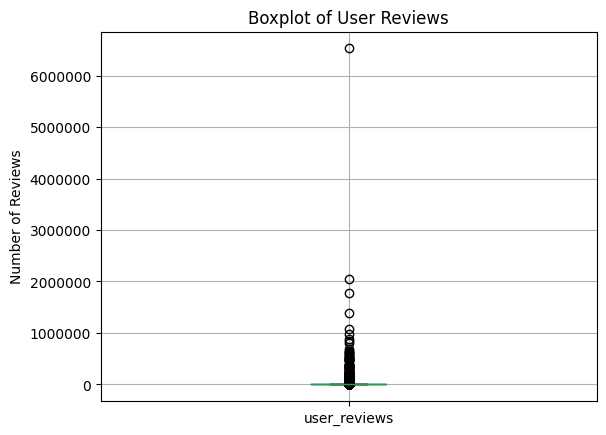

In [98]:
sg_df['user_reviews'] = sg_df['user_reviews'].astype(float) 

sg_df.boxplot(column='user_reviews')
plt.title('Boxplot of User Reviews')
plt.ylabel('Number of Reviews')
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [99]:
sg_df['user_reviews'].describe()

count     73767
mean       1327
std       30288
min           1
25%           5
50%          19
75%         101
max     6531097
Name: user_reviews, dtype: float64

Let's check the "upper" outliers

In [100]:
Q3 = 101
Q1=5
IQR = Q3-Q1
Limit=IQR*1.5
UL = Limit+Q3
len(sg_df[sg_df['user_reviews'] >UL])/len(sg_df)*100

16.46400151829409

In [101]:
sg_df[sg_df['user_reviews']>UL]

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",Death is lonely. He has zero friends on his Fa...,Death is lonely. He has zero friends on his Fa...,Arcade side-scroller with strategy elements! F...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Adventure', 'Indie']",0,225,45,50000 - 100000,703,0,782,0,0,"{'Action': 27, 'Indie': 27, 'Adventure': 26, '...",270
10,1026420,WARSAW,"Oct 2, 2019",Summer deal that we recommend! SacriFire – the...,Use everything at your disposal to help a team...,WARSAW is a challenging turn-based tactical RP...,62,"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG']",0,589,212,20000 - 50000,67,0,93,0,5,"{'Tactical RPG': 255, 'Turn-Based Strategy': 2...",801
15,22670,Alien Breed 3: Descent,"Nov 17, 2010",Alien Breed™ 3: Descent is the final explosive...,Alien Breed™ 3: Descent is the final explosive...,Experience the final explosive chapter in the ...,64,"['Single-player', 'Multi-player', 'Co-op', 'St...",['Action'],0,349,134,200000 - 500000,44,0,24,0,3,"{'Action': 53, 'Shooter': 27, 'Sci-fi': 18, 'A...",483
17,346560,Hero of the Kingdom II,"Feb 20, 2015",Sail to the farthest islands to save your sist...,Sail to the farthest islands to save your sist...,You and your sister had finally found a haven ...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Adventure', 'Casual', 'Indie', 'RPG']",0,2046,120,100000 - 200000,280,0,303,0,5,"{'Adventure': 104, 'Casual': 68, 'Point & Clic...",2166
22,434030,Aerofly FS 2 Flight Simulator,"Nov 20, 2017",Aerofly FS 2 lets you explore the world of fly...,Aerofly FS 2 lets you explore the world of fly...,Aerofly FS 2 Flight Simulator lets you explore...,0,"['Single-player', 'Partial Controller Support']","['Action', 'Indie', 'Racing', 'Simulation']",0,1490,408,100000 - 200000,127,0,127,0,19,"{'Flight': 177, 'Simulation': 167, 'VR': 161, ...",1898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111280,3598130,Big Rigs: Over the Road Racing,"Apr 8, 2025","Get ready for some brake jamm'in, CB talk'in, ...","Get ready for some brake jamm'in, CB talk'in, ...","Get ready for some brake jamm'in, CB talk'in, ...",8,"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Adventure', 'Racing']",0,252,69,0 - 20000,0,0,0,0,7,"{'Psychological Horror': 323, 'Racing': 180, '...",321
111310,3272300,Yasuke Simulator,"Mar 20, 2025",In a land where samurai roam and power is defi...,In a land where samurai roam and power is defi...,"Step into 1579 as Yasuke, the African samurai,...",0,"['Single-player', 'Family Sharing']","['Action', 'Casual', 'Simulation']",0,1800,45,0 - 20000,0,0,0,0,9,"{'Historical': 383, 'Story Rich': 293, 'Realis...",1845
111351,3447410,The Test: Reality Check,"Feb 24, 2025","(This game, as well as many others in our bund...","(This game, as well as many others in our bund...",The Test: Reality Check is one of multiple ins...,0,"['Single-player', 'Full controller support', '...","['Adventure', 'Casual', 'Indie', 'RPG', 'Simul...",0,401,5,0 - 20000,0,0,0,0,0,"{'Simulation': 426, 'RPG': 405, 'Choices Matte...",406
111373,1374490,RuneScape: Dragonwilds,"Apr 15, 2025","Special Offer About the Game Locate them, thro...","Locate them, throw down the gauntlet and carve...",On RuneScape’s forgotten continent of Ashenfal...,0,"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'RPG', 'Early Access']",0,7817,1401,0 - 20000,0,0,0,0,47313,"{'Early Access': 279, 'Survival': 273, 'Multip...",9218


This is a significant number so I will not remove the outliers for now

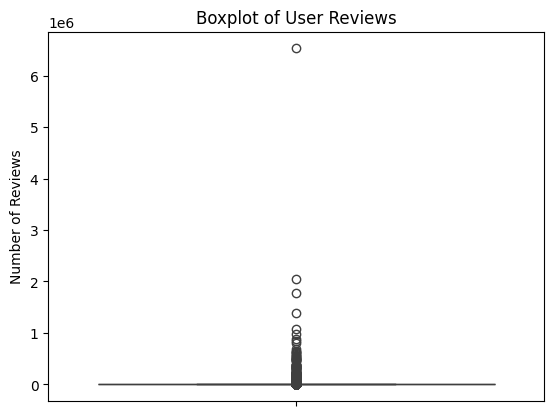

In [104]:
sns.boxplot(y='user_reviews', data=sg_df)
plt.title('Boxplot of User Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [105]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'user_score', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'user_reviews'],
      dtype='object')

I noticed that there are some reviews not in English, so let's filter them out. I will use a library called langid to remove them.

In [107]:
pip install langid

Note: you may need to restart the kernel to use updated packages.


In [108]:
sg_df["desc_lang"] = sg_df["detailed_description"].apply(lambda x: langid.classify(x)[0]) #checks each row of the detailed description column and classifies the text as eng or other languages and stores that value in a new column called "desc_lang"
sg_df = sg_df[sg_df["desc_lang"] == "en"] #Keeping only rows which have a detailed description in english
sg_df = sg_df.drop(columns="desc_lang") #dropping the new column as we do not need it anymore
sg_df

C:\Users\icefo\AppData\Local\Temp\ipykernel_24624\2960794763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_df["desc_lang"] = sg_df["detailed_description"].apply(lambda x: langid.classify(x)[0]) #checks each row of the detailed description column and classifies the text as eng or other languages and stores that value in a new column called "desc_lang"


,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,user_reviews
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,"['Single-player', 'Multi-player', 'Steam Achie...","['Casual', 'Indie', 'Sports']",0,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie']",0,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,"['Single-player', 'Full controller support']","['Adventure', 'Casual', 'Indie']",0,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,"['Single-player', 'Steam Achievements']","['Adventure', 'Indie']",0,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Adventure', 'Casual', 'Free to Play', 'Massi...",0,87,49,50000 - 100000,0,0,0,0,68,"{'Turn-Based Combat': 292, 'Massively Multipla...",136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Simulation', 'Strategy']",0,144,34,0 - 20000,0,0,0,0,524,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178
111445,1721060,Mandragora: Whispers of the Witch Tree,"Apr 17, 2025",Base and Digital Deluxe Edition Rewards About ...,Mandragora: Whispers of the Witch Tree is a da...,Slay your way in Mandragora: Whispers of the W...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie', 'RPG']",0,500,234,0 - 20000,0,0,0,0,3326,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",734
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Strategy']",0,1,0,0 - 20000,0,0,0,0,0,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1
111447,3600970,Paragon Of Time,"Apr 10, 2025","You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the darkness that is corrupting time its...,0,"['Single-player', 'Full controller support', '...","['Action', 'Casual', 'Indie']",0,5,0,0 - 20000,0,0,0,0,0,"{'Action Roguelike': 296, 'Bullet Hell': 290, ...",5


The model took a while so I may have to export the database to avoid redoing it.

The model removed around  73767 - 72371 = 1396 rows. This will decrease the noise in the database and we did not remove too many rows which is good.

Upon closer inspection, I have decided to remove the playtime metrics and use the user_reviews as a measure for popularity.

In [112]:
sg_df.drop(columns = ['average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu'], inplace=True)

In [113]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'user_score', 'positive', 'negative', 'estimated_owners', 'tags',
       'user_reviews'],
      dtype='object')

In [114]:
sg_df["user_score"].describe()

count   72371
mean        0
std         2
min         0
25%         0
50%         0
75%         0
max       100
Name: user_score, dtype: float64

Let's check the number of rows with user score higher than 0

In [116]:
sg_df[sg_df["user_score"]>0]

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,user_score,positive,negative,estimated_owners,tags,user_reviews
204,906050,Hentai Case Opening,"Sep 27, 2018",Hentai Case Opening is a totally classic case ...,Hentai Case Opening is a totally classic case ...,Hentai Case Opening is a totally classic case ...,0,['Single-player'],"['Casual', 'Indie']",63,54,29,0 - 20000,"{'Sexual Content': 38, 'Nudity': 37, 'Casual':...",83
923,371120,Discouraged Workers,"Sep 16, 2015","Overview As a hospital coordinator, Ga-yeon fe...","Overview As a hospital coordinator, Ga-yeon fe...",『Discouraged Workers』 is an independent progre...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'Indie']",59,61,38,0 - 20000,"{'Nudity': 100, 'Sexual Content': 69, 'Mature'...",99
1737,720380,Ancestors Legacy Free Peasant Edition,"Feb 6, 2018",Purchase Full Version Now / Featured DLC About...,Get a taste of medieval battles in this free v...,Ancestors Legacy Free Peasant Edition represen...,0,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Strategy'],77,585,167,100000 - 200000,"{'Violent': 34, 'Strategy': 26, 'Gore': 25, 'R...",752
2155,1014730,Cyndy,"May 16, 2019",Strip 'Em II: Facka's Game launch. Please cons...,Strip 'Em II: Facka's Game launch. Please cons...,"Welcome to Cyndy, a porn adventure. The world ...",0,"['Single-player', 'Steam Achievements']",['Simulation'],68,16,6,0 - 20000,"{'Early Access': 21, 'Nudity': 29, 'Sexual Con...",22
2649,471720,K Station,"Jun 15, 2016","&gt; WHAT IS GOING ON?! It's New Year's Day, 2...","&gt; WHAT IS GOING ON?! It's New Year's Day, 2...","It's New Year's Day, 2319, and the happy deniz...",0,"['Single-player', 'Captions available', 'Steam...","['Adventure', 'Casual', 'Indie']",100,10,0,0 - 20000,"{'Adventure': 24, 'Indie': 23, 'Casual': 22}",10
6784,966460,Undress Tournament,"Jan 24, 2019","Welcome to Ligthsin City, where you will satis...","Welcome to Ligthsin City, where you will satis...",Undress Tournament is an hentai visual novel s...,0,"['Single-player', 'Steam Achievements', 'In-Ap...","['Adventure', 'Casual', 'Free to Play', 'RPG']",57,12,9,0 - 20000,"{'Sexual Content': 24, 'Free to Play': 23, 'Nu...",21
8563,961640,The Tower of Five Hearts,"Nov 14, 2018",Story There are five continents of roughly-equ...,Story There are five continents of roughly-equ...,A cute and adorable yuri visual novel featurin...,0,['Single-player'],['Indie'],100,16,0,0 - 20000,"{'Nudity': 24, 'Indie': 22, 'Sexual Content': ...",16
8741,962380,HOT FIT!,"Nov 30, 2018",This story is about a main character working a...,This story is about a main character working a...,This story is about a main character working a...,0,['Single-player'],['Adventure'],80,28,7,0 - 20000,"{'Nudity': 28, 'Sexual Content': 27, 'Adventur...",35
8812,588920,BADASS,"Apr 7, 2017","In your little town, people see you as a compl...","In your little town, people see you as a compl...",Save the world and find the girl of your dream...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Adventure', 'Casual', 'Indie', 'RPG', 'Simul...",51,15,14,0 - 20000,"{'Nudity': 62, 'Sexual Content': 59, 'RPG': 36...",29
9591,928060,Hentai Lady,"Oct 19, 2018","Move the fragments of the image, gradually col...","Move the fragments of the image, gradually col...",Open the image by solving the puzzle under rel...,0,"['Single-player', 'Steam Achievements']","['Casual', 'Indie']",69,11,4,0 - 20000,"{'Nudity': 33, 'Sexual Content': 32, 'Indie': ...",15


We will drop it as most of the rows are nulls

In [118]:
sg_df.drop(columns = "user_score", inplace=True)

In [119]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'positive', 'negative', 'estimated_owners', 'tags', 'user_reviews'],
      dtype='object')

In [120]:
sg_df

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,positive,negative,estimated_owners,tags,user_reviews
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,"['Single-player', 'Multi-player', 'Steam Achie...","['Casual', 'Indie', 'Sports']",6,11,0 - 20000,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie']",53,5,0 - 20000,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,"['Single-player', 'Full controller support']","['Adventure', 'Casual', 'Indie']",3,0,0 - 20000,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,"['Single-player', 'Steam Achievements']","['Adventure', 'Indie']",50,8,0 - 20000,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Adventure', 'Casual', 'Free to Play', 'Massi...",87,49,50000 - 100000,"{'Turn-Based Combat': 292, 'Massively Multipla...",136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Simulation', 'Strategy']",144,34,0 - 20000,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178
111445,1721060,Mandragora: Whispers of the Witch Tree,"Apr 17, 2025",Base and Digital Deluxe Edition Rewards About ...,Mandragora: Whispers of the Witch Tree is a da...,Slay your way in Mandragora: Whispers of the W...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie', 'RPG']",500,234,0 - 20000,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",734
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Strategy']",1,0,0 - 20000,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1
111447,3600970,Paragon Of Time,"Apr 10, 2025","You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the darkness that is corrupting time its...,0,"['Single-player', 'Full controller support', '...","['Action', 'Casual', 'Indie']",5,0,0 - 20000,"{'Action Roguelike': 296, 'Bullet Hell': 290, ...",5


I am going to use TF-IDF to give weight to each tag

I need to first create new column with 5 highest tags as one sentence. The current tags column contains a dictionary with the frequency. The frequency might be useful but to use it I would need to scale it down and even then it would increase the size of data tf-idf would have to work with. As such, I will just use the top 5 tags.

The tags column is not a dictionary but actually string. I will convert it to a dictionary first

I will need to use a python library called ast

In [125]:
sg_df["tags_dict"] = sg_df["tags"].apply(ast.literal_eval)

sg_df["tags_dict"]


0         {'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...
1         {'Indie': 109, 'Action': 103, 'Pixel Graphics'...
3         {'2D Platformer': 161, 'Atmospheric': 154, 'Su...
4         {'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...
5         {'Turn-Based Combat': 292, 'Massively Multipla...
                                ...                        
111443    {'Simulation': 77, 'Strategy': 67, 'Rome': 51,...
111445    {'Action RPG': 267, 'Souls-like': 259, 'Dark F...
111446    {'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...
111447    {'Action Roguelike': 296, 'Bullet Hell': 290, ...
111449    {'Simulation': 70, 'Walking Simulator': 44, 'I...
Name: tags_dict, Length: 72371, dtype: object

In [126]:
sg_df.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'positive', 'negative', 'estimated_owners', 'tags', 'user_reviews',
       'tags_dict'],
      dtype='object')

In [127]:
def top_5_tags(x): #this function checks if the value is a dictionary or list or empty then returns the top 5 tags if possible
    if isinstance(x, dict):
        return list(x.keys())[:5] 
    elif isinstance(x, list):
        return x[:5]  #if it's a list
    else:
        return []  # empty or unexpected type

sg_df["top_5_tags"] = sg_df["tags_dict"].apply(top_5_tags)

In [ ]:
sg_df["top_5_tags"]= sg_df["top_5_tags"].apply(lambda x: " ".join(x)) #this is to convert the list into a single string for tf-idf

In [129]:
sg_df["top_5_tags"]

0                               Indie Casual Sports Bowling
1                      Indie Action Pixel Graphics 2D Retro
3          2D Platformer Atmospheric Surreal Mystery Puzzle
4             Indie Adventure Nudity Violent Sexual Content
5         Turn-Based Combat Massively Multiplayer Multip...
                                ...                        
111443     Simulation Strategy Rome City Builder Historical
111445          Action RPG Souls-like Dark Fantasy RPG 2.5D
111446                   Casual Strategy Puzzle Relaxing 2D
111447    Action Roguelike Bullet Hell Hack and Slash Ro...
111449    Simulation Walking Simulator Idler First-Perso...
Name: top_5_tags, Length: 72371, dtype: object

In [130]:
sg_df[["tags","tags_dict","top_5_tags"]].sample(30)

,tags,tags_dict,top_5_tags
69070,"{'Class-Based': 789, 'Co-op': 780, 'Character ...","{'Class-Based': 789, 'Co-op': 780, 'Character ...",Class-Based Co-op Character Customization Acti...
25772,"{'Adventure': 21, 'RPG': 21, 'Female Protagoni...","{'Adventure': 21, 'RPG': 21, 'Female Protagoni...",Adventure RPG Female Protagonist
99483,"{'Action-Adventure': 176, 'Platformer': 170, '...","{'Action-Adventure': 176, 'Platformer': 170, '...",Action-Adventure Platformer Metroidvania Pixel...
54052,"{'2D Platformer': 51, 'Retro': 45, 'Action': 4...","{'2D Platformer': 51, 'Retro': 45, 'Action': 4...",2D Platformer Retro Action Pixel Graphics Adve...
28196,"{'Free to Play': 48, 'Indie': 40, 'Casual': 38...","{'Free to Play': 48, 'Indie': 40, 'Casual': 38...",Free to Play Indie Casual Horror Mystery
1442,"{'Word Game': 121, 'Typing': 89, 'Spelling': 8...","{'Word Game': 121, 'Typing': 89, 'Spelling': 8...",Word Game Typing Spelling Indie Adventure
111032,"{'Horror': 182, 'Casual': 176, 'Adventure': 17...","{'Horror': 182, 'Casual': 176, 'Adventure': 17...",Horror Casual Adventure Mystery Atmospheric
28707,"{'2.5D': 143, 'Top-Down': 137, 'Singleplayer':...","{'2.5D': 143, 'Top-Down': 137, 'Singleplayer':...",2.5D Top-Down Singleplayer Nature Stealth
97163,"{'Casual': 64, 'Rhythm': 50, '3D': 41, '2D': 3...","{'Casual': 64, 'Rhythm': 50, '3D': 41, '2D': 3...",Casual Rhythm 3D 2D Old School
33881,{'Indie': 25},{'Indie': 25},Indie


I am done with cleaning and adding new features (for now)

In [ ]:
sg_df_clean= sg_df.copy() #this is to make sure that we do not reference the original dataframe every time so we create a copy of it

#### __Natural Language Processing__

__TF-IDF__

My plan is to use Term Frequency-Inverse Document Frequency (TF-IDF) for tags. TF-IDF is used to score the importance of a word by checking the frequency of the word in each document (game) and then searching for that word in other documents. 
Term Frequency: Checks how frequency of the word in the document (game). Higher frequency = Higher score.
Inverse Document Frequency: Checks the frequency of the word in other documents (games). Higher frequency = lower score as this means the word cannot be used for differentiating different documents. 

At the end, I will use the results of both TF-IDF on tags and another model on "about_the_game" to find similar games using cosine similarity. Cosine similarity is used to find the angle between vectors (embeddings) and as such will be helpful for filtering out similar games

Let's use TF-IDF on the 5 tags column

In [135]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit and transform the reviews
X = vectorizer.fit_transform(sg_df_clean['top_5_tags'])

# Create a new DataFrame with the TF-IDF values
tfidf_df = pd.DataFrame(
    X.toarray(), columns=vectorizer.get_feature_names_out())
print("tfidf_df shape:", tfidf_df.shape)
print("tfidf_df columns:", tfidf_df.columns)

# Display the new DataFrame
tfidf_df.head()

tfidf_df shape: (72371, 26888)
tfidf_df columns: Index(['1980s', '1980s 1990', '1980s 2d', '1980s action', '1980s adventure',
       '1980s america', '1980s anime', '1980s arcade', '1980s atmospheric',
       '1980s automobile',
       ...
       'zombies vampire', 'zombies vehicular', 'zombies villain',
       'zombies violent', 'zombies visual', 'zombies voxel', 'zombies vr',
       'zombies wargame', 'zombies werewolves', 'zombies world'],
      dtype='object', length=26888)


,1980s,1980s 1990,1980s 2d,1980s action,1980s adventure,1980s america,1980s anime,1980s arcade,1980s atmospheric,1980s automobile,...,zombies vampire,zombies vehicular,zombies villain,zombies violent,zombies visual,zombies voxel,zombies vr,zombies wargame,zombies werewolves,zombies world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
x = tfidf_df.sum() #to sum the frequency of the tags

In [ ]:
x.describe() #just to see the distribution

In [138]:
xs = x.sort_values(ascending=False).head(10) #a dataframe of the top 10 tags to be used for visualization

In [139]:
xl = x.sort_values(ascending=False).head(100) #a dataframe of the top 100 tags to be used for visualization

In [140]:
xs

indie          3935
action         3762
casual         3382
adventure      3325
strategy       2045
simulation     1880
rpg            1866
platformer     1825
puzzle         1703
indie casual   1662
dtype: float64

Let's create a bar chart to see the most important tags according to TF-IDF

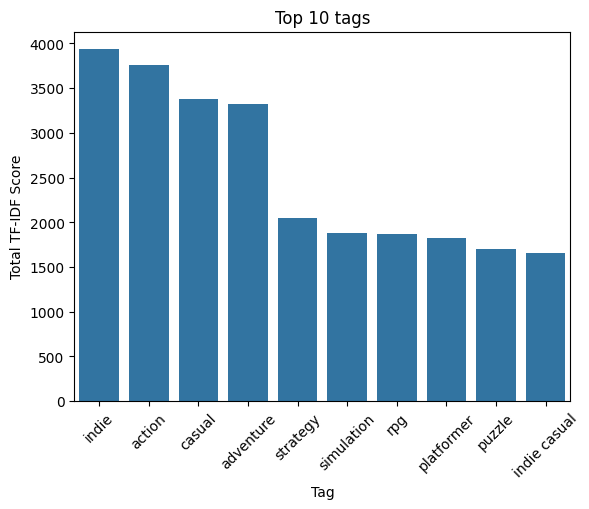

In [141]:
sns.barplot(x=xs.index, y=xs.values) 
plt.title('Top 10 tags')
plt.xlabel('Tag')
plt.ylabel('Total TF-IDF Score')
plt.xticks(rotation=45) 
plt.show()

Let's create a word cloud of the top 100 tags

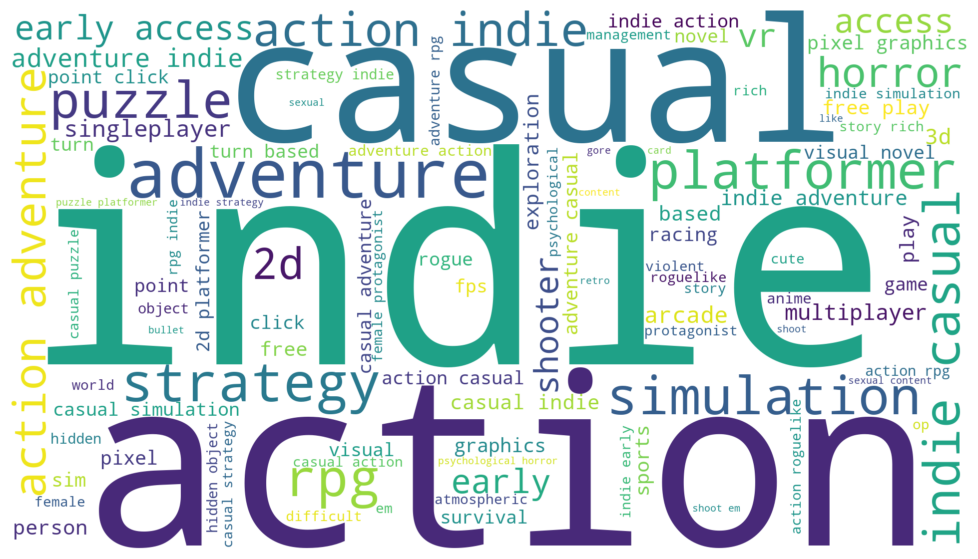

In [142]:
wordcloud = WordCloud(width=1920, height=1080, background_color='white')
wordcloud.generate_from_frequencies(xl.to_dict())

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I will create a new column called rating which shows the percentage of positive reviews out of all reviews for each game

In [144]:
sg_df_clean["rating"] = sg_df_clean["positive"]/(sg_df_clean["positive"]+sg_df_clean["negative"])*100
sg_df_clean

,ID,name,release_date,detailed_description,about_the_game,short_description,metacritic_score,categories,genres,positive,negative,estimated_owners,tags,user_reviews,tags_dict,top_5_tags,rating
0,20200,Galactic Bowling,"Oct 21, 2008",Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,0,"['Single-player', 'Multi-player', 'Steam Achie...","['Casual', 'Indie', 'Sports']",6,11,0 - 20000,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",17,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Indie Casual Sports Bowling,35
1,655370,Train Bandit,"Oct 12, 2017",THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie']",53,5,0 - 20000,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",58,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",Indie Action Pixel Graphics 2D Retro,91
3,1355720,Henosis™,"Jul 23, 2020",HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,0,"['Single-player', 'Full controller support']","['Adventure', 'Casual', 'Indie']",3,0,0 - 20000,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",3,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",2D Platformer Atmospheric Surreal Mystery Puzzle,100
4,1139950,Two Weeks in Painland,"Feb 3, 2020",ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,0,"['Single-player', 'Steam Achievements']","['Adventure', 'Indie']",50,8,0 - 20000,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",58,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",Indie Adventure Nudity Violent Sexual Content,86
5,1469160,Wartune Reborn,"Feb 26, 2021",Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,0,"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Adventure', 'Casual', 'Free to Play', 'Massi...",87,49,50000 - 100000,"{'Turn-Based Combat': 292, 'Massively Multipla...",136,"{'Turn-Based Combat': 292, 'Massively Multipla...",Turn-Based Combat Massively Multiplayer Multip...,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111443,1989760,Pax Augusta,"Apr 17, 2025",Pax Augusta Out Now 🎉 Pax Augusta is out – and...,Pax Augusta - The ultimate ancient city-buildi...,Pax Augusta is probably the most authentic anc...,0,"['Single-player', 'Steam Achievements', 'Steam...","['Simulation', 'Strategy']",144,34,0 - 20000,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",178,"{'Simulation': 77, 'Strategy': 67, 'Rome': 51,...",Simulation Strategy Rome City Builder Historical,81
111445,1721060,Mandragora: Whispers of the Witch Tree,"Apr 17, 2025",Base and Digital Deluxe Edition Rewards About ...,Mandragora: Whispers of the Witch Tree is a da...,Slay your way in Mandragora: Whispers of the W...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Indie', 'RPG']",500,234,0 - 20000,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",734,"{'Action RPG': 267, 'Souls-like': 259, 'Dark F...",Action RPG Souls-like Dark Fantasy RPG 2.5D,68
111446,3593600,Starry Trace,"Apr 14, 2025",Welcome to Starry Trace ! A relaxing yet brain...,Welcome to Starry Trace ! A relaxing yet brain...,Starry Trace is a relaxing puzzle game where p...,0,"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Strategy']",1,0,0 - 20000,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",1,"{'Casual': 81, 'Strategy': 75, 'Puzzle': 71, '...",Casual Strategy Puzzle Relaxing 2D,100
111447,3600970,Paragon Of Time,"Apr 10, 2025","You stand at the edge of time, trying to save ...","You stand at the edge of time, trying to save ...",Crush the 

Let's check the distribution of the rating column

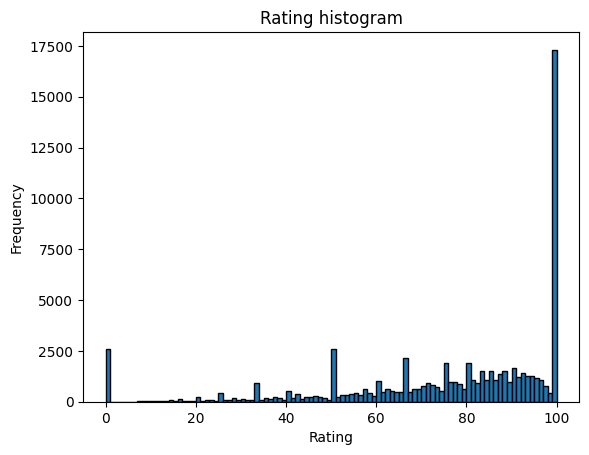

In [145]:
data = sg_df_clean["rating"] 

plt.hist(data, bins=100, edgecolor='black')
plt.title('Rating histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

So many games have 100% rating because the games with a low number of ratings (less than 5 reviews for example) are more likely to be 100% positive. This creates a problem that I will need to resolve later to reduce bias. 

In [146]:
sg_df_clean["rating"].describe()

count   72371
mean       76
std        25
min         0
25%        65
50%        83
75%        98
max       100
Name: rating, dtype: float64

In [147]:
sg_df_clean.columns

Index(['ID', 'name', 'release_date', 'detailed_description', 'about_the_game',
       'short_description', 'metacritic_score', 'categories', 'genres',
       'positive', 'negative', 'estimated_owners', 'tags', 'user_reviews',
       'tags_dict', 'top_5_tags', 'rating'],
      dtype='object')

__BERT__:

Bidirectional Encoder Representations from Transformers (BERT) is a transformer model developed by google and trained on a large amount of English text. The model is good for understanding text and context since it is bidirectional. It converts text (encodes) it to embeddings (vectors) that we can use later on for cosine similarity. BERT has many applications such as search engines, name entity recognition and sentiment analysis.

In this project, I just need it to convert the paragraphs in "about the game" to embeddings (768 vectors) for each game. These embeddings will then be used with TF-IDF for cosine similarity.

Let's use BERT on paragraphs now. I am going to use the base uncased (does not care about upper case and lower case) version for now to create a baseline.

In [150]:
# Load BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert_model = AutoModel.from_pretrained('bert-base-uncased')

In [151]:
paragraph_list = sg_df_clean["about_the_game"].tolist() #converting them to a list for the model

In [152]:
print(torch.cuda.is_available()) #checking if cuda is recognized to run it on the gpu

True


In [153]:
print(torch.__version__)

2.10.0.dev20251210+cu128


In [154]:
print("CUDA available:", torch.cuda.is_available()) #further checks for cuda
print("CUDA version (PyTorch):", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")


CUDA available: True
CUDA version (PyTorch): 12.8
GPU: NVIDIA GeForce RTX 5080


I am trying to run the model on the gpu but I keep getting errors, I will use the code below to override these errors

BERT is relatively old so it needs a lot of work to run it on the GPU.

In [158]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load tokenizer and BERT model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_model.eval()
bert_model.to(device)

# List to store embeddings
embeddings_list = []

# Batch size (adjust depending on GPU VRAM)
batch_size = 128

for i in range(0, len(paragraph_list), batch_size):
    batch = paragraph_list[i:i+batch_size]

    # Tokenize and move to GPU
    inputs = tokenizer(
        batch,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()} #moving vectors to gpu

    # Forward pass
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # CLS token embedding
    cls_emb = outputs.last_hidden_state[:, 0, :]
    embeddings_list.extend(cls_emb.cpu().tolist()) #returning values to cpu

# Add embeddings to DataFrame
sg_df_clean["embeddings"] = embeddings_list

# Save to CSV
sg_df_clean.to_csv("sg_df_with_bert_embeddings.csv", index=False)

print("DONE. Embeddings saved.")

Using device: cuda
DONE. Embeddings saved.


In [159]:
sg_df_clean["embeddings"]

0         [-0.07497307658195496, -0.7272389531135559, 0....
1         [-0.29194822907447815, -0.48010897636413574, 0...
3         [0.08930474519729614, -0.6193512678146362, 0.1...
4         [0.0007658986723981798, -0.4197463393211365, 0...
5         [-0.36756381392478943, -0.47853443026542664, 0...
                                ...                        
111443    [-0.0913769081234932, -0.35515061020851135, 0....
111445    [-0.2555581331253052, -0.33433493971824646, -0...
111446    [-0.2096734493970871, -1.052761435508728, 0.25...
111447    [-0.3875976502895355, -0.871425986289978, 0.31...
111449    [-0.5060913562774658, -0.5845046639442444, 0.4...
Name: embeddings, Length: 72371, dtype: object

In [160]:
pd.to_pickle(sg_df_clean["embeddings"], 'embeddings_V1.pkl') #exporting the embeddings to pickle format as it is faster

In [161]:
pd.to_pickle(tfidf_df, "TF-IDF_V1.pkl") #exporting the tf-idf matrix to pickle format as it is faster

In [162]:
sg_df_clean.drop(columns=['embeddings']).to_csv('data.csv', index=False)

The project continues in the next notebook. I am splitting it into multiple notebooks as I have run into memory errors as I am processing a relatively large database and cosine similarity is memory hungry.